# Practical Statistics for Data Scientists
### Chapter 1. Exploratory Data Analysis
This chapter focuses on the first step in any data science project: exploring the
data. Exploratory data analysis, or EDA, is a comparatively new area of
statistics. In 1962, **John W. Tukey** called for a reformation of statistics in his seminal paper “The Future of Data Analysis” [Tukey-1962]. With the ready availablility of computing power and expressive data analysis software, exploratory data analysis has evolved well beyond its original scope. Key drivers of this discipline have been the rapid development of new technology, access to more and bigger data, and the greater use of quantitative analysis in a variety of disciplines.

Data: https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from IPython.display import Image

In [4]:
medal_count = pd.read_excel("./Medals.xlsx")
medal_count.head(10)

/home/mazhar/miniconda3/envs/mytfenv/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
5,6,Australia,17,7,22,46,6
6,7,Netherlands,10,12,14,36,9
7,8,France,10,12,11,33,10
8,9,Germany,10,11,16,37,8
9,10,Italy,10,10,20,40,7


In [5]:
medal_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [6]:
len(medal_count)

93

In [7]:
medal_count.shape

(93, 7)

In [8]:
medal_count.dtypes

Rank              int64
Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

In [9]:
medal_count.columns

Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')

In [10]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## 1. Estimates of Location:

In [11]:
# Mean:

mean = medal_count["Total"].mean()
print("The mean of the Total number of the medals is:\n", mean)

The mean of the Total number of the medals is:
 11.612903225806452


In [12]:
# Weighted Mean:

weighted_mean = np.average(medal_count["Total"], weights = medal_count['Gold'])
print("The weighted mean of the Total number of the medals is:\n", weighted_mean)

The weighted mean of the Total number of the medals is:
 46.832352941176474


In [13]:
# Trimmed Mean or Truncated Mean:

from scipy.stats import trim_mean

trimmed_mean = trim_mean(medal_count['Gold'], 0.1)
print("The trimmed mean of the Total number of the medals is:\n", trimmed_mean)

The trimmed mean of the Total number of the medals is:
 1.96


In [14]:
# Median:

median = medal_count['Total'].median()
print("The median of the Total number of the medals is:\n", median)

The median of the Total number of the medals is:
 4.0


In [15]:
# Weighted Median:

def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

wm = weighted_median(medal_count, 'Total', 'Gold')
print("The Weighted Median of the Total number of the Gold medals is:\n", wm)


The Weighted Median of the Total number of the Gold medals is:
 40


In [16]:
# Percentile:

q3 = np.percentile(medal_count['Total'], 75)

print("The 75 percent of the Total number of the medals is:\n", q3)


The 75 percent of the Total number of the medals is:
 11.0


## 2. Estimates of Variability (Dispersion Metrics):

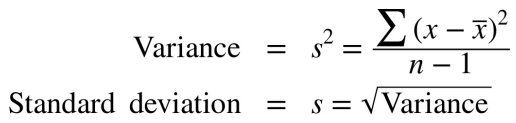

In [18]:
#Import library
from IPython.display import Image
# Load image from local storage
PIC1 = Image(filename = "./STDNVAR.png", width = 400, height = 100)
PIC1

In [19]:
# Variance:

from statistics import variance
var = variance(medal_count['Gold'])

print("The variance of the Total number of the Gold medals is:\n", var)

The variance of the Total number of the Gold medals is:
 49.315100514259


In [20]:
# Standard Deviation:

from statistics import stdev
sd = stdev(medal_count['Gold'])

print("The Standard Deviation of the Total number of the Gold medals is:\n", sd)

The Standard Deviation of the Total number of the Gold medals is:
 7.022471111671375


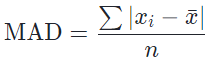

In [21]:
# Mean absolute deviation: The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.

#Import library
from IPython.display import Image
# Load image from local storage
PIC2 = Image(filename="./MAD.png", width=300, height=120)
PIC2


In [22]:
from numpy import mean, absolute
MAD = mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

print("The Mean absolute deviation of the Total number of the Gold medals is:\n", MAD)

The Mean absolute deviation of the Total number of the Gold medals is:
 4.0048560527228565


In [23]:
# Median absolute deviation:

from numpy import median, absolute
MAD1 = median(absolute(medal_count['Gold'] - median(medal_count['Gold'])))

print("The Median absolute deviation of the Total number of the Gold medals is:\n", MAD1)

The Median absolute deviation of the Total number of the Gold medals is:
 1.0


### Interquartile range:
In descriptive statistics, the interquartile range tells you the spread of the middle half of your distribution. Quartiles segment any distribution that’s ordered from low to high into four equal parts (25%, 50%, 75%, 100%). The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set. Whereas the range gives you the spread of the whole data set, the interquartile range gives you the range of the middle half of a data set.

1. The interquartile range is found by subtracting the Q1 value from the Q3 value: iqr = q3 - q1
2. The interquartile range is an especially useful measure of variability for skewed distributions.


In [24]:
# Interquartile range:

q3, q1 = np.percentile(medal_count['Gold'], [75, 25])
iqr = q3 - q1

print("The Interquartile range of the Gold medals is:\n", iqr)

The Interquartile range of the Gold medals is:
 3.0


## 3. Exploring the Data Distribution:

#### Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

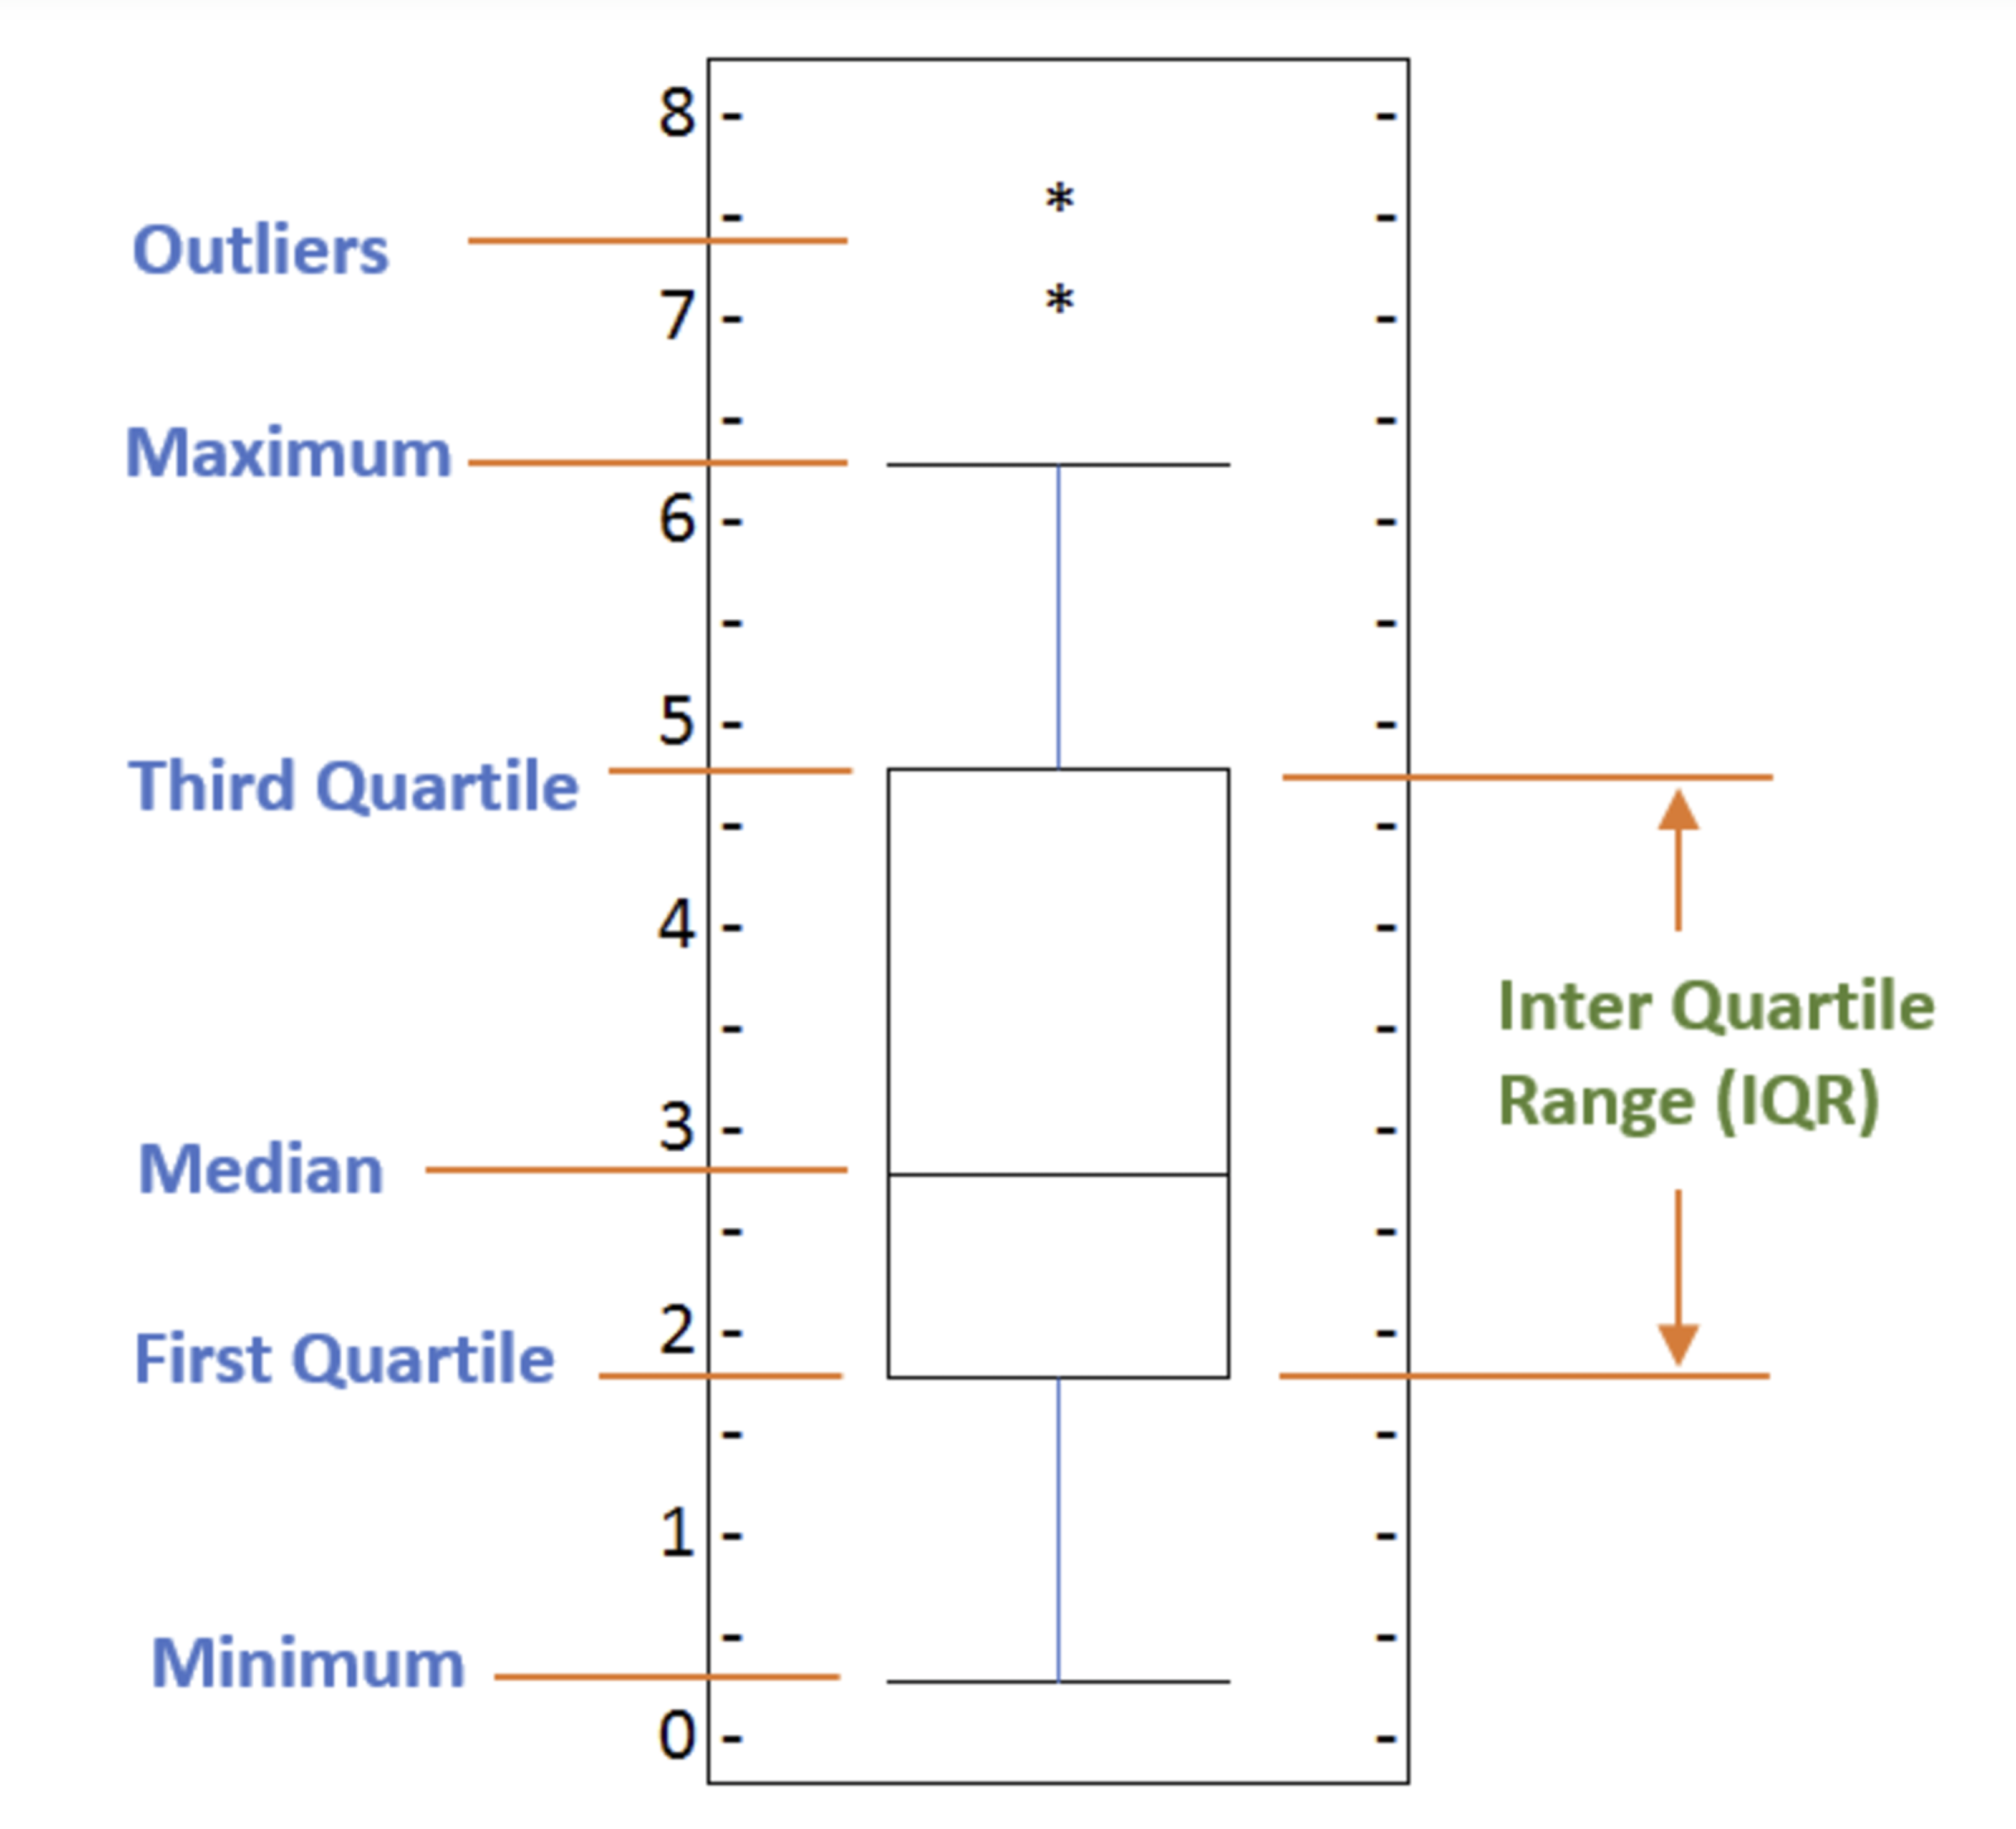

In [25]:
from IPython import display 
display.Image("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png", width=440)

<Axes: >

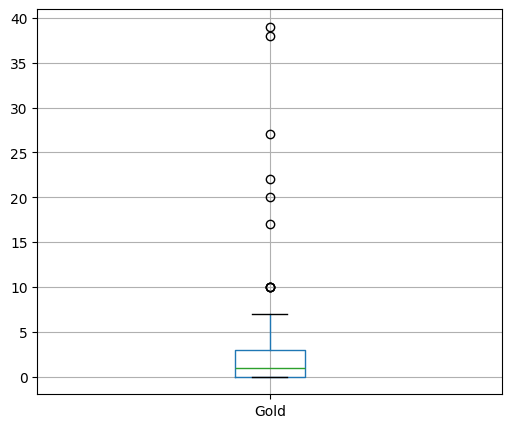

In [26]:
# Boxplot:

medal_count.boxplot(column ='Gold', by = None, ax = None, figsize=(6,5))

The top and bottom of the box (black horizontal lines) are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The dashed lines (vertical), referred to as whiskers, extend from the top and bottom to indicate the range for the bulk of the
data. 

In [27]:
# Frequency table:

frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count['Gold'], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

/tmp/ipykernel_1924/3264536350.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_table.groupby('freq')['Rank'].count().reset_index()


,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [28]:
# Histogram:

np.histogram(medal_count['Gold'])

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

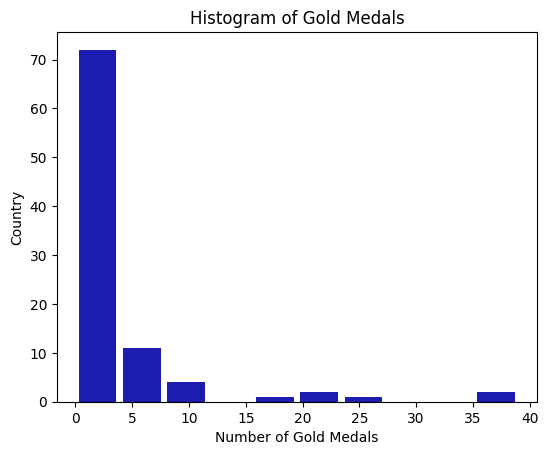

In [29]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(x=medal_count['Gold'], bins=10, color = '#0504aa', alpha=0.9, rwidth=0.85)
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')
plt.title('Histogram of Gold Medals')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

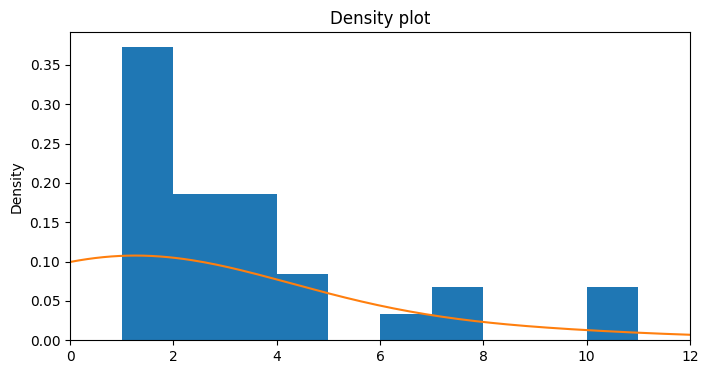

In [30]:
# Density plot:

ax = medal_count['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12), figsize=(8,4))
medal_count['Gold'].plot.density(ax=ax)
plt.title('Density plot')
plt.show()

Related to the histogram is a density plot, which shows the distribution of data
values as a continuous line. Above plot shows a density estimate superposed on a histogram plot.

# 4. Exploring Binary and Categorical Data:

In [65]:
# Mode:
medal_count['Gold'].mode()

0    0
dtype: int64

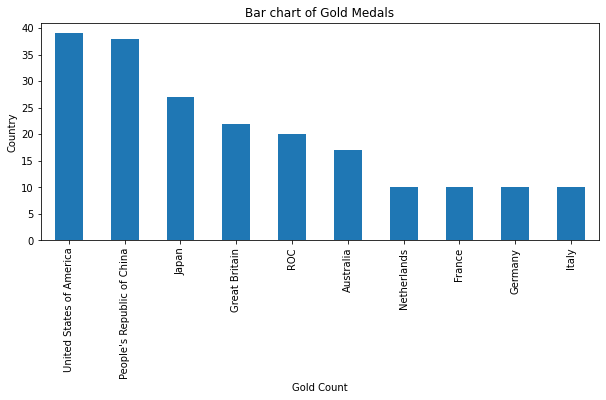

In [66]:
# Bar charts:
ax = medal_count.iloc[:10, :].plot.bar(x = 'Team/NOC', y = 'Gold', figsize=(10,4), legend=False)
ax.set_xlabel("Gold Count")
ax.set_ylabel("Country")
plt.title('Bar chart of Gold Medals')
plt.show()

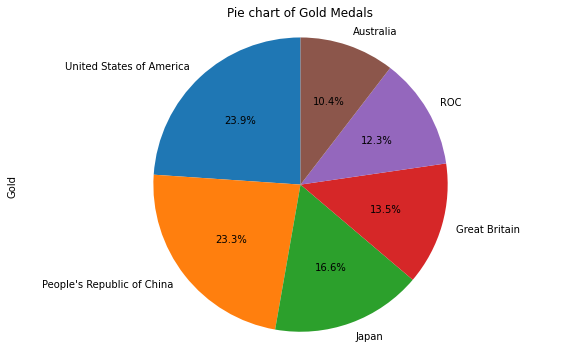

In [67]:
# Pie charts:

pie_data = medal_count.iloc[:6, :]

pie_data['Gold'].plot(kind='pie',labels=pie_data['Team/NOC'], figsize=(10, 6),
                        autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Pie chart of Gold Medals')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## 5. Correlation:

**Positive Correlation:** Independent variable X and dependent variable Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y.

**Negative Correlation:** If high values of X go with low values of Y, and vice versa, the variables are said to be negatively correlated.

**Correlation matrix:** A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.

**Correlation coefficient:** A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).

In [68]:
# Correlation matrix:

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


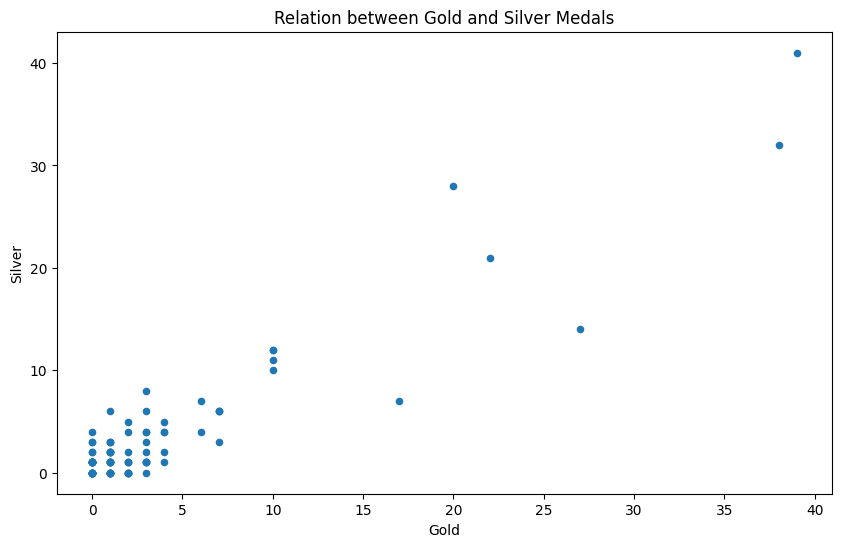

In [ ]:
# Scatterplot:
%matplotlib inline
from matplotlib import pyplot as plt

medal_count.plot.scatter(x="Gold", y ="Silver", figsize=(10, 6))
plt.title('Relation between Gold and Silver Medals')
plt.show()

## 6. Exploring Two or More Variables:


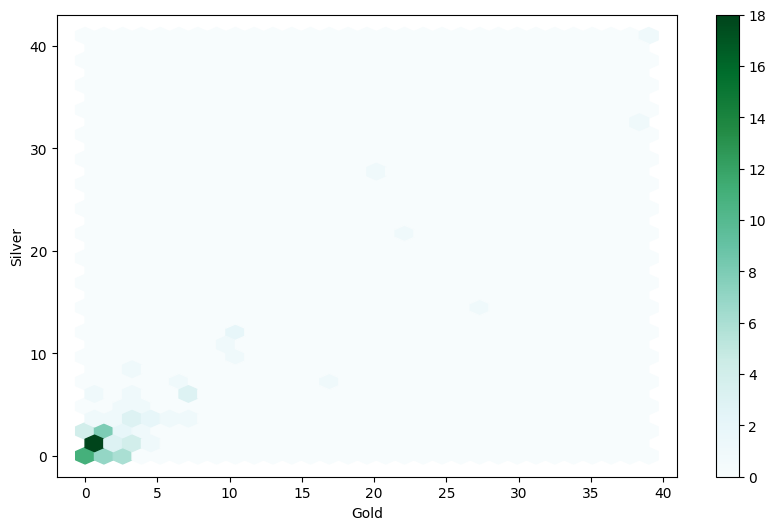

In [47]:
# Hexagonal binning:
_ = medal_count.plot.hexbin(x="Gold", y ="Silver",figsize=(10, 6), gridsize=30, sharex=False)
plt.show()

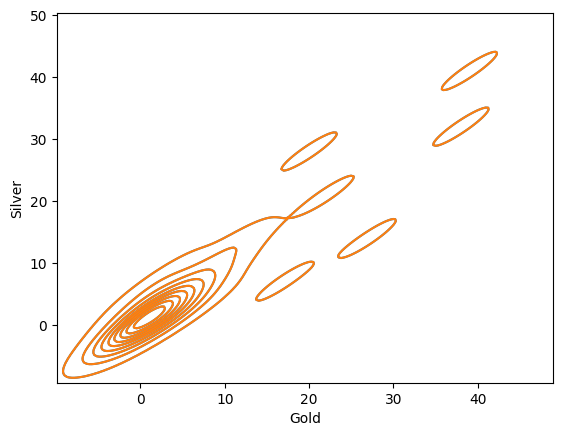

In [50]:
# Contour plots:
_ = sns.kdeplot(x=medal_count["Gold"], y=medal_count["Silver"])
plt.show()

In [54]:
medal_count

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [ ]:
# Heatmap:
sns.heatmap(medal_count.corr())

ValueError: could not convert string to float: 'United States of America'

In [55]:
# Contingency tables: A tally of counts between two or more categorical variables.

crosstab = medal_count[["Silver", "Gold"]].pivot_table(index="Silver", columns="Gold",
               aggfunc=lambda x: len(x), margins = True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,12.0,6.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
2,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,2.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


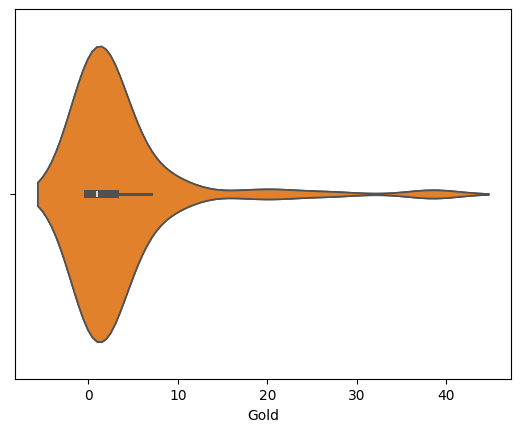

In [57]:
# Violin Plot: Similar to a boxplot but showing the density estimate.

_ = sns.violinplot(x=medal_count["Gold"])
plt.show()

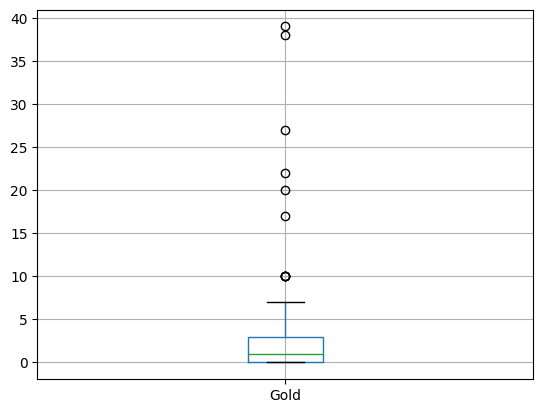

In [58]:
_ = medal_count.boxplot(column="Gold")
plt.show()

## Summary:

1. The key idea of EDA is that the first and most important step in any project based
on data is to look at the data.
2. By summarizing and visualizing the data, you can gain valuable intuition and understanding of the project.
3. This chapter has reviewed concepts ranging from simple metrics, such as estimates of location and variability, to rich visual displays to explore the relationships between multiple variables.
4. The R and Python languages, has created a plethora of ways to explore and analyze data.
5. Exploratory analysis is a cornerstone of any data science project.
